In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)

In [2]:
DATA_PATH = Path.cwd().parent / "ML"

In [3]:
features_df = pd.read_csv(
    DATA_PATH / "Training set values.csv", index_col="id"
)
labels_df = pd.read_csv(
    DATA_PATH / "Training set labels.csv",index_col="id" 
)
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (59400, 39)


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
features_df.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [5]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (59400, 1)


,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [6]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'status_group')

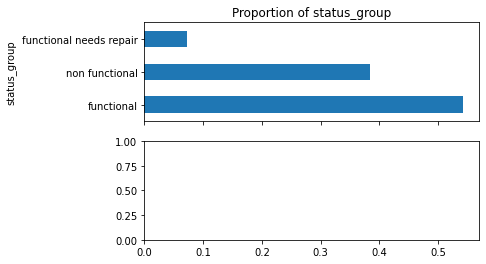

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['status_group']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of status_group", ax=ax[0])
)
ax[0].set_ylabel("status_group")


In [9]:
joined_df = features_df
print(joined_df.shape)
joined_df.head()

(59400, 39)


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

RANDOM_SEED = 6    # Set a random seed for reproducibility!


In [11]:
features_df.dtypes != "object"

amount_tsh                True
date_recorded            False
funder                   False
gps_height                True
installer                False
longitude                 True
latitude                  True
wpt_name                 False
num_private               True
basin                    False
subvillage               False
region                   False
region_code               True
district_code             True
lga                      False
ward                     False
population                True
public_meeting           False
recorded_by              False
scheme_management        False
scheme_name              False
permit                   False
construction_year         True
extraction_type          False
extraction_type_group    False
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_group            False
quantity

In [12]:
labels_df.dtypes

status_group    object
dtype: object

In [13]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['amount_tsh' 'gps_height' 'longitude' 'latitude' 'num_private'
 'region_code' 'district_code' 'population' 'construction_year']


In [14]:
Object_cols = features_df.columns[features_df.dtypes == "object"].values
print(Object_cols)

['date_recorded' 'funder' 'installer' 'wpt_name' 'basin' 'subvillage'
 'region' 'lga' 'ward' 'public_meeting' 'recorded_by' 'scheme_management'
 'scheme_name' 'permit' 'extraction_type' 'extraction_type_group'
 'extraction_type_class' 'management' 'management_group' 'payment'
 'payment_type' 'water_quality' 'quality_group' 'quantity'
 'quantity_group' 'source' 'source_type' 'source_class' 'waterpoint_type'
 'waterpoint_type_group']


In [15]:
# change the features into numeric
for label in Object_cols:
    sizes = features_df[label].value_counts(sort = 0).keys()
    count = 1
    for row in sizes:
        features_df[label][features_df[label] == row ] = count
        count+=1
    
    features_df[label] = features_df[label].apply(pd.to_numeric)
    
Object_cols = features_df.columns[features_df.dtypes == "object"].values

X=features_df[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private','water_quality',
 'region_code', 'district_code' ,'population', 'construction_year']]

#missing value handled
X[:]=np.nan_to_num(X)


C:\Users\ASUS\AppData\Local\Temp/ipykernel_6136/2640386316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df[label][features_df[label] == row ] = count
C:\Users\ASUS\AppData\Local\Temp/ipykernel_6136/2640386316.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:]=np.nan_to_num(X)
d:\python39\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X,labels_df, test_size=0.3)

In [17]:
# # Instantiate model with 10 decision trees
# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# # Train the model on training data
# model.fit(X, labels_df)
# #preds =model.predict(X_test)
# #preds

In [18]:
from xgboost import XGBClassifier
# # fit model no training data
model = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=6,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9 ,
                    seed=27)
model.fit(X_train,y_train)
preds =model.predict(X_test)
preds

d:\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
d:\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array(['functional', 'non functional', 'functional', ...,
       'non functional', 'functional', 'non functional'], dtype=object)

In [19]:
# from sklearn.svm import SVR
# model =SVR()
# model.fit(X_train,y_train)
# preds =model.predict(X_test)
# preds

In [20]:
# from sklearn.linear_model import LogisticRegression

# # instantiate the model (using the default parameters)
# model = LogisticRegression()

# # fit the model with data
# model.fit(X,labels_df)

In [21]:
# from sklearn.neural_network import  MLPClassifier
# model =  MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, ), random_state=1,activation = 'logistic')
# model.fit(X_train,y_train)
# preds =model.predict(X_test)
# preds

In [22]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.7236812570145903


In [23]:
test_features_df = pd.read_csv(DATA_PATH / "Test set values.csv", index_col="id")

In [24]:
# change the features into numeric
test_Object_cols = test_features_df.columns[test_features_df.dtypes == "object"].values
for label in test_Object_cols:
    sizes = test_features_df[label].value_counts(sort = 0).keys()
    count = 1
    for row in sizes:
        test_features_df[label][test_features_df[label] == row ] = count
        count+=1
    
    test_features_df[label] = test_features_df[label].apply(pd.to_numeric)
    

C:\Users\ASUS\AppData\Local\Temp/ipykernel_6136/2992421330.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features_df[label][test_features_df[label] == row ] = count


In [25]:
#missing value handled
test_features_df[:]=np.nan_to_num(test_features_df)

print (test_features_df.columns)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')


In [26]:
test_probas = model.predict(test_features_df[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private','water_quality',
 'region_code', 'district_code' ,'population', 'construction_year']])
test_probas

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [27]:
#from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print(test_features_df[test_features_df[:]])
#print("Accuracy:",metrics.accuracy_score(test_features_df[test_features_df[:]], test_probas))

In [28]:
submission_df = pd.read_csv(DATA_PATH / "submissionformat.csv", 
                            index_col="id")
submission_df.head()

,status_group
id,
50785,predicted label
51630,predicted label
17168,predicted label
45559,predicted label
49871,predicted label


In [29]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)
# Save predictions to submission data frame
submission_df["status_group"] = test_probas[:]


submission_df.head()

,status_group
id,
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional


In [30]:
submission_df.to_csv('my_submission.csv', index=True)

In [31]:

import pandas as pd

# Extract feature importances
fi = pd.DataFrame({'feature': list(X.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
0,amount_tsh,0.165793
5,water_quality,0.128856
6,region_code,0.125080
9,construction_year,0.103348
7,district_code,0.093868


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

                         precision    recall  f1-score   support

             functional       0.74      0.82      0.78      9694
functional needs repair       0.47      0.24      0.32      1262
         non functional       0.72      0.68      0.70      6864

               accuracy                           0.72     17820
              macro avg       0.64      0.58      0.60     17820
           weighted avg       0.71      0.72      0.71     17820

